<a href="https://colab.research.google.com/github/chalshaff12/sharing-repo/blob/master/GoodReadsAPIwithPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Katas

---


by Michal Shaffer

**Exploring the goodreads.com API with python**

---
[Goodreads.com](https://www.goodreads.com/) is a website where users can look up information about books and save them to their own 'shelves'. This way, readers can track the books they have read, they want to read, and any other category of 'shelf'. I am a long-time user of goodreads and wanted to see what I could do with their API and some python programming. 

As an example, these are the shelves on my goodreads account:

![my shelves](https://i.imgur.com/h3189JN.png?2)

#####For this project the following tasks will be completed:


1.   Look up goodreads API documentation 
2.   Get an API key if necessary
3.   Connect to the API
4.   Parse return data
  * Convert xml return data into json or dict format
5.  Utilize the following python functions:
  *   The `map()` function
  *   The `reduce()` function
      * A peek at matplotlib for extra credit
  *   The `filter()` function
  *   `lambda` expressions
  *   `list comprehension`


##1) Goodreads API documentation

Goodreads' API documentation is found on their [API page](https://www.goodreads.com/api/index).
On the page you can see the various methods available. We are going to use the [shelves.list](https://www.goodreads.com/api/index#shelves.list) and the [review.list](https://www.goodreads.com/api/index#reviews.list) API calls. 

![methods list](https://i.imgur.com/hkfFCSs.png)

Clicking on a method will bring you to do the detailed explanation which include the url, HTTP method, and parameter details. 

![sample method](https://i.imgur.com/PTmvfMP.png)


Before we start writing our python code, we need to get an API key for goodreads.



##2) Goodreads API key

Goodreads provides a simple [form](https://www.goodreads.com/api/keys) to request a developer key. As soon as the form is submitted you will be give a developer key as well as a 'secret' key. For our purposes, we only need the developer key. Under the form you can view the terms of service for using the goodreads API.

Ok, time to write some code!


##3) Connecting to the API

Our first step is to import the library we will need to get the API data. I am using `requests` (documentation found [here](https://2.python-requests.org/en/master/).)

In [0]:
import requests

After looking at the API documentation, I know that I will need a url, API key, and a user ID as the parameters for the reviews.list call, so let's set up some variables.

In [0]:
shelves_url = "https://www.goodreads.com/shelf/list.xml" #url to get a user's shelves
api_key = 'ArRrjtg6wbdYjO5hMqgg' #API key 
user_id= "38649296" #a goodreads user's ID

Now, using the requests library we imported earlier, let's request the API call and see the status of the page we requested. 

In [0]:
#call the API with parameters from variables set earilier
res = requests.get(f'{shelves_url}?key={api_key}&user_id={user_id}') 
#get api page status to validate apikey
status = res.status_code 
print("Status code:", status) #status 200 is what we want! 

Status code: 200


Status code 200 is great! 

Now we have to parse through the response data. 

##4) Parse the Return data

According to the goodreads API documentation, the method we just called returned data in XML format. We can see the datadump with 


> `print(res.text)`

but it is not necessary.

XML data is hard to parse through in python, so we'll be utilizing the [xmltodict](https://pypi.org/project/xmltodict/) library to convert the xml into more of a json-like format. 

Let's import that now.



In [0]:
#you need to install xmltodict before importing the library
!pip install xmltodict 
import xmltodict

Okay, time to get some data! Let's keep it simple for now, and just put all the user shelves into a list called `shelf_list`.

In [0]:
#parse the data with xmltodict and put the new json-formatted data in the shelf_data variable
shelf_data = xmltodict.parse(res.text)
#declare shelf_list as a list
shelf_list = []
#Navigate to the individual shelves and put that in a new shelves variable
shelves = shelf_data['GoodreadsResponse']['shelves']['user_shelf']
#loop through each user_shelf and store the shelf name in the shelf_list list
for shelf in shelves:
  shelf_list.append(shelf['name'])
#print our new list
print("Shelf List:" , shelf_list)

Shelf List: ['read', 'currently-reading', 'to-read', 'korean-edition', 'taking-a-break']


Awesome! We got some real, usable data!

Ok, time to use some python functions!

##5) Utilize Python functions




---


### a. using `map()` to solve Problem 1


**Problem 1:**
Using the goodreads API we have gotten information on a user's goodreads shelves. Through the documentation we know we can also get information on individual books, including book ratings. I've always been curious on what the average book rating was on each individual user shelf. Are my 'read' books rated higher, on average, than my 'gave-up' books? I also want to know if the books I've shelved in my 2016 shelf are higher-quality (and therefor rated higher) on average, than the books I shevled in my 2017 shelf.

 

**Solution to Problem 1:**
After looking through the goodreads API documentation, I saw the [review.list](https://www.goodreads.com/api/index#reviews.list) method would give me a list of books in a user's list, along with the books details. 
Using that method and a specially crafted function called `avgRatingofShelf`, I'll get the average rating of all the books in a given shelf. Then, I'll use the `map()` function with the `avgRatingofShelf` on the `shelf_list` we made earlier to get the average book rating for each shelf for our user.


First thing we need is the url for the API call to the list of books in our shelf:

In [0]:
books_url = "https://www.goodreads.com/review/list.xml"

Now, let's make a quick function that will take a result from our API call and add some data we want from that result onto a list. We'll call this function later.

In [0]:
def append_rating(books): 
  #use a list comprehension to compile a list of the average rating for each book
  book_data = [float(book['average_rating']) for book in books if isinstance(book['average_rating'],str)]
  return book_data

Now let's make our `build_book_data_list()` function which will call an `append[something]()` function to get the data we want. It will also take a couple more paramters:

In [0]:
#our function takes three arguments, the user shelf we want to look through,
#the function we want to call that will append items to our list, and the user_id 
def build_book_data_list(shelf, appending_func, user_id):
  #the first call to the API to get some basic info we'll need, like how many pages we'll have to go through
  res_shelf = requests.get(f'{books_url}?key={api_key}&v=1&id={user_id}&shelf={shelf}') #call api
  #convert xml to json-like format
  books_in_shelf = xmltodict.parse(res_shelf.text)
  #get the number of pages in the result
  pages = int(books_in_shelf['GoodreadsResponse']['books']['@numpages'])
  book_list = []
  #loop through each page of results to get the data we want
  for page in range(1, pages+1):
    #in the loop, we look at each page individually with the extra page parameter
    this_page = requests.get(f'{books_url}?key={api_key}&v=1&id={user_id}&shelf={shelf}&page={page}') #call api
    #xml to json-like format for this page's result
    response_data = xmltodict.parse(this_page.text)
    #getting to the book details
    books = response_data['GoodreadsResponse']['books']['book']
    book_list.extend(appending_func(books))        #pass in our book and list to append to
  return book_list #return our list of data

The function we just created returns a list of data, we need the average of that list. Let's make one more quick function.

In [0]:
def get_avg_rating_of_shelf(shelf):
  rating_list = build_book_data_list(shelf, append_rating, user_id) #first call our earlier function to get the list of ratings
  #calculate the average rating from our new list
  average_rating = 0
  if rating_list: #if the list isn't empty, get the average
    average_rating = sum(rating_list) / len(rating_list) #get the average
  return("%.2f" % average_rating) #return the average to two decimals


Ok, that's our function.

Let's do a test run on our 'read' shelf:
(Disclaimer: this does take some time to run because it has to do a new API call for each page of results!)



In [0]:
get_avg_rating_of_shelf('read')

'4.07'

Awesome, it works!
Ok, Lets use the `map()` function now on our list and see our results!

In [0]:
rating_list = list(map(get_avg_rating_of_shelf, shelf_list))
print("Shelf List:", shelf_list) #our shelves
print("Ratings List:", rating_list) #our average ratings per shelf

Shelf List: ['read', 'currently-reading', 'to-read', 'korean-edition', 'taking-a-break']
Ratings List: ['4.07', '3.96', '4.07', '4.17', '4.08']


As you can see, the map function ran the function for each item in our list, and we got a result list with the returned values for each item. 






---


### b. using `reduce()` to solve Problem 2


**Problem 2:**
Keeping this one a little more simple, I just want to see the total number of books on all a user's shelves. 

**Solution to Problem 2:**
Using the [reviews.list](https://www.goodreads.com/api/index#reviews.list) method and python's `reduce()` function we can a list of all the totals per shelf and then quickly add them all up!

In the XML return data we saw before, I noticed an element called `book-count` for each `user-shelf` element. In there, there was an attribute called #text which is what we will need to save in our new list.

We already called the reviws.list API, so lets use our previous variables to call up the new data we need.

In [0]:
#remember our old friend, shelf_data? It holds all the json-formatted API return data from earlier
#Navigate to the individual shelves and put that in a new shelf_totals variable
shelf_totals = shelf_data['GoodreadsResponse']['shelves']['user_shelf']
#use list comprehension to make a list of the total books per list
totals_list = [int(shelf['book_count']['#text']) for shelf in shelf_totals]
#print our new list
print("Totals List:", totals_list)

Totals List: [222, 2, 107, 2, 2]


Cool! Now we have a list of numbers! Before we can call the `reduce()` function on this list, we need to import it.

In [0]:
from functools import reduce

And we also need to create a function that will actually be doing the addition!

(Note: the addition can also be done using `operator.add` if `operator` is imported.) 

In [0]:
def add_it_up(x, y): 
  return x + y

Alright! Time to call `reduce()`!

In [0]:
book_total = reduce(add_it_up, totals_list)
print("Total number of books:", book_total)

Total number of books: 335


As you can see, the `reduce()` function helped us add up all the numbers in the list. We used `reduce()` for a simple sum of the list, but it can actually be much more powerful than that. It calls a given function on the first two items on the list, then that result plus the next item, and so on, until the end of the list. So it is able to calculate or perform operations on an entire list and return you one result in the end. 


---


  ### *.MatPlotLib Extra


Let's show a quick graphic of the data we just pulled out of the API using the [matplotlib](https://matplotlib.org/index.html) library.

First let's import the library:

In [0]:
import matplotlib.pyplot as plot

Now let's do a quick calculation of the percentage of total books that each shelf holds. 

We'll do this using our `map()` and `lambda expression`s. `lambda expression` will perform a division of each item by the total number of books, as `map()` iterates through the list.

In [0]:
shelf_percentage = list(map(lambda x: x/book_total, totals_list))

After looking through the documentation of matplotlib, I decided to use a simple pie chart. 

First, let's set up the labels and percentages to show correctly in our chart:

In [0]:
labels = shelf_list #label each with the shelf-name
sizes = shelf_percentage #the size is the percentage we calculated earlier
explode = (0, 0.2, 0, 0.2, 0.4)  #pull out the smaller slices so they are readable

Now we'll set the subplots of the chart, build the chart, and set the axis aspect ratio to show a circle. Lastly, we'll display the chart.

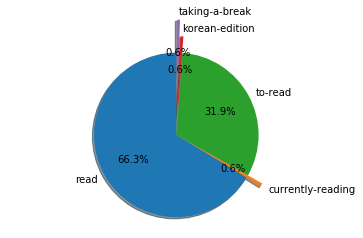

In [0]:
fig1, ax1 = plot.subplots() #plots the graphic with a figure and axis elements
#call the function that creates the graphic with all the parameters we set
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', 
        shadow=True, startangle=90) 
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plot.show() #display the graphic!





---


### c. using `filter()` to solve Problem 3


**Problem 3:**
The goodreads API has a compare.list method which is supposed to check which books one user has in common with another user. However, the compare.list method requires the use of OAuth which we are not using for this project. But, I still want to see which books I have in common with my friend on our 'read' shelf. 


**Solution to Problem 3:**
We can create two lists, one with all the books on my 'read' shelf, and another with my friend's 'read' shelf. Then, using the `filter()` on those two lists, we can get a new list of only our books in common! I'm going to get the ISBN of each book as it will be more unique than the title or author. 

First let's declare our friend's goodreads user_id and shelf as the 'read' shelf.

(Side note: every goodreads user has a 'read', 'to-read', and 'currently reading' shelf.)

In [0]:
user_id_friend = '40006310-rs'
shelf = 'read'

Now let's use our `build_book_data_list()` that we created before, we just have to edit the data we want to pull with a new `appendSomething()` function:


In [0]:
def append_isbn(books):
  #use a list comprehension to compile a list of the isbns for each book
  book_data = [book['isbn'] for book in books if isinstance(book['isbn'],str)]
  return book_data

Great! Lets call the `build_book_data_list()` function on both of our users now, to create the two new lists of books. 

(Note, the more books a user has in their list, the longer this will take as it has to make a new API call for each page of results.)

In [0]:
my_list = build_book_data_list(shelf, append_isbn, user_id)
my_friends_list = build_book_data_list(shelf, append_isbn, user_id_friend)

In [0]:
print("My List:", my_list)
print("My Friend's List:", my_friends_list)

My List: ['0312642989', '0312642970', '0316469777', '1492671525', '1911475274', '0425163407', '081299826X', '0312642962', '0520274067', '1260151778', '1683690397', '0385338694', '0440241901', '0061161640', '0520266978', '1632062143', '0060502932', '1250135028', '1416914285', '0062439626', '1476778159', '0441013813', '0385351232', '1250165342', '1442408928', '1250316774', '0451155750', '0425215679', '0142001805', '0525951989', '1442472456', '1594749477', '0765375869', '1442472421', '0393324826', '0812550706', '0786838655', '0061234001', '0061001783', '0670024856', '014044906X', '0884271781', '0385743602', '147671746X', '8925556782', '1419727729', '0399590501', '0375751513', '159606885X', '1401308589', '1501181823', '0425284689', '0385743580', '006245773X', '0449818438', '1984801813', '8983920696', '8983920688', '082483867X', '0824838130', '1596064854', '0385743564', '0525522875', '0812517725', '0812511816', '1593080425', '0061020710', '0765376679', '0751565350', '0752816993', '037307631

Great! Now that we have the two lists, let's use `filter()` to get a single new list of only our books in common. The first thing we need is a function that will check if an item in one list is also in the other.

In [0]:
def filter_books(my_friends_book):
  return my_friends_book in my_list

Now, let's call the `filter()` function! Our first argument is the `filter_books()` function and the second is the `myFriendsList`. Remember that we used the `filter_books()` function to check the input against the `myList` list, so we don't need to put the `myList` list into the `filter()` function.

In [0]:
filtered_books = list(filter(filter_books, my_friends_list))
print("Books in common:", filtered_books)
print("Number of books in common:", len(filtered_books)) #see the length of the list to find out how many books were in common

Books in common: ['1984801813', '0525522875', '1593080425', '1416914285', '0751565350', '0765378558', '030788743X', '0618062416', '075640407X', '0061001783', '014044906X', '0425215679', '0451457811', '1563127873', '0440439884', '0440227534', '0141311924', '0451528522', '0142300497', '0141318309', '0330398008', '0060776005', '0486282228', '141693586X', '0440471478', '0812550706', '0156012197', '0439321611', '0439064864', '0141311371', '0060513039', '0385338694', '0374500010', '0786838655', '1420925539', '0439321603', '0394820371', '0440498058', '0765350378', '0451528956', '0515105198', '0439358078', '0439785960', '006112527X', '0312330871', '0385351232', '0385732554', '0066238501', '0765316897', '076531178X', '0765316889', '1401308589', '0439554934', '0142001805', '0140621679', '0061161640', '0060502932', '0060853980', '0618260307', '0375826696', '0439861365', '0316015849', '0375831002', '0765330423', '0545010225', '0517223627', '043965548X', '0192802631', '0141439580', '0452284244']
Nu

There you have it, all of the books I have in common with my friend in our 'read' shelves.

Another way the `filter()` function can be used to accomplish this same task is to also make use of the Anonymous python `lambda expression` or with `list comprehension` as follows:


> `filter(lambda book: book in my_list, my_friends_list) #lambda and filter()`
>
> `[book for book in my_list if book in my_friends_list] #list comprehension`




We will discuss more about `lambda expression()` and `list comprehension` soon!

> Indented block



Let's solve one more problem with `filter()`. I want to see all the book titles in my 'to-read' list that have an average rating above 4.5. Let's use a new `append()` function and our `build_book_data_list()` again.

In [0]:
def append_ratings_and_title(books):
  #use a list comprehension to compile a list of the data for each book
  book_data = [[book['title'], float(book['average_rating'])] for book in books if isinstance(book['average_rating'],str)]
  return book_data

Ok, let's call our main function and save the results:

In [0]:
ratings_list = build_book_data_list(shelf, append_ratings_and_title, user_id)

Now let's `filter()` for ratings above 4.5, using `lambda expression` as well:

In [0]:
filtered_list = filter(lambda x: x[1] > 4.5, ratings_list) 
print("Books ratings > 4.5:", list(filtered_list)) 

Books ratings > 4.5: [['Skyward (Skyward, #1)', 4.55], ['Thunderhead (Arc of a Scythe, #2)', 4.52], ['해리 포터와 마법사의 돌 2 (Harry Potter #1, part 2 of 2)', 4.6], ['해리 포터와 마법사의 돌 1 (Harry Potter #1, part 1 of 2)', 4.61], ['The Way of Kings (The Stormlight Archive, #1)', 4.65], ['The Name of the Wind (The Kingkiller Chronicle, #1)', 4.54], ['Mistborn Trilogy (Mistborn, #1-3)', 4.56], ['Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)', 4.56], ['Harry Potter and the Deathly Hallows (Harry Potter, #7)', 4.62], ['Harry Potter and the Goblet of Fire (Harry Potter, #4)', 4.55], ['Harry Potter and the Half-Blood Prince (Harry Potter, #6)', 4.56]]


Now we have a list of titles and ratings above 4.5. You can see how versatile `filter()` can be, especially when used in combination with `lambda expression`s or other functions.





---


### d. using `lambda` expressions to solve Problem 4


**Problem 4:**
I have over 100 books saved in my 'to-read' shelf. How long will it take me to read all of those books?

**Solution to Problem 4:**
Looking at the return xml for the review.list method, I see a tag named 'num_pages' that has the number of pages for each book. If I read an average of 1 page every certain amount of seconds, I can use an anonymous `lambda` expression together with a `map()` and `reduce()` function to get the total number of hours it would take to read all the books on my to-read list as well as the average amount of time per book. 

Let's edit our earlier function to put the number of pages per book into a new list.

In [0]:
def append_pages(books):
  #use a list comprehension to compile a list of the data for each book
  book_data = [int(book['num_pages']) for book in books if isinstance(book['num_pages'],str)]
  return book_data

Let's call our `build_book_data_list()` function and save the result into  a new variable.

In [0]:
pages_list = build_book_data_list(shelf, append_pages, user_id)

Using the `map()` as well as `lambda expression`s, let's get a list of the hours it would take to read each book in our list.

In [0]:
#set how many seconds it takes you to read one page
seconds = 75
seconds_per_hour = 3600
#use lambda to calculate the hours it would take to read each number of pages in the pages_list
hours_per_book = list(map(lambda pages: pages * seconds / seconds_per_hour, pages_list))
print("Number of pages:", pages_list)
print("Number of hours:", hours_per_book)

Number of pages: [144, 827, 552, 133, 308, 64, 367, 439, 513, 454, 400, 296, 320, 304, 404, 374, 448, 394, 288, 224, 394, 288, 522, 485, 387, 368, 422, 289, 352, 315, 483, 359, 423, 402, 324, 374, 323, 504, 320, 336, 435, 303, 324, 377, 320, 354, 325, 501, 288, 237, 252, 384, 417, 256, 600, 416, 352, 367, 148, 196, 208, 288, 342, 416, 224, 55, 160, 291, 436, 235, 232, 209, 248, 88, 386, 325, 705, 814, 464, 210, 1007, 343, 374, 237, 256, 400, 552, 254, 368, 366, 434, 306, 369, 410, 297, 201, 419, 383, 332, 308, 256, 254, 166, 122, 106, 58, 662, 321, 226, 320, 189, 123, 406, 336, 352, 286, 224, 412, 222, 374, 115, 385, 255, 322, 64, 635, 2448, 277, 688, 572, 590, 224, 767, 93, 137, 208, 184, 358, 223, 248, 489, 464, 423, 249, 391, 64, 390, 231, 423, 304, 192, 202, 211, 199, 208, 243, 96, 735, 435, 155, 870, 759, 264, 373, 734, 144, 341, 652, 489, 474, 409, 362, 30, 79, 32, 283, 82, 532, 279, 72, 176, 291, 222, 329, 216, 154, 92, 186, 128, 256, 211, 400, 240, 206, 541, 366, 638, 501, 503,

You can see that using a combination of `map()` and `lambda` expressions can be very powerful.

Now we have our list of hours it would take to read each book. Let's get the total hours for all the books, and the average hours it would take to read each.

In [0]:
#total hours 
total_hours = sum(hours_per_book)
print("Read-time of all books in hours:", total_hours)
#average
average_hours = total_hours/len(hours_per_book)
print("Average read-time per book in hours:", average_hours)

Read-time of all books in hours: 1476.541666666666
Average read-time per book in hours: 7.202642276422761






---


### e. using a `list comprehension` to solve Problem 5


**Problem 5:**
Given the data we have already gotten about the shelves for this user, I want to see all the data per shelf in one nested list, without having to make another API call. 


**Solution to Problem 5:**

Using `list comprehensions` we can create a matrix the names of the shelves, the total books in each, as well as the average review for the books in the shelf, and then transpose the matrix so that we have a nested list, each inner list holding the various data for one shelf.

First, let's take a quick peak at the data we already have:

In [0]:
print("Shelves:", shelf_list)
print("Books in shelf:", totals_list)
print("Average rating per shelf:", rating_list)

Shelves: ['read', 'currently-reading', 'to-read', 'korean-edition', 'taking-a-break']
Books in shelf: [222, 2, 107, 2, 2]
Average rating per shelf: ['4.07', '3.96', '4.07', '4.17', '4.08']


Now, let's put those three lists into a matrix:

In [0]:
shelf_matrix = [shelf_list, rating_list, totals_list]

Finally, let's use `list comprehension` to transpose these lists into the nested list we want to see, without having to write complex nested for loops.

In [0]:
#the inner list comprehension compiles the elements at a certain index of each list
#e.g. it will create a new list containing the first element of each list
#the outer list comprehension simply counts from 0 to the number of elements in the first list,
#specifying that index for the inner comprehension
transpose = [[row[shelf] for row in shelf_matrix] for shelf in range(len(shelf_list))]
print ("Transposed matrix:", transpose)

Transposed matrix: [['read', '4.07', 222], ['currently-reading', '3.96', 2], ['to-read', '4.07', 107], ['korean-edition', '4.17', 2], ['taking-a-break', '4.08', 2]]


Note: this operation can also be done using the `zip()` function as follows:


> `zip(shelf_list, totals_list, rating_list)`

This is one example of the simplicity of using `list comprehension`. You can create new lists by performing operations on already existing lists or other data without for loops. It also allows for conditionals, though we have not used them here.





## Signing off


There's so much more that can be done with the goodreads.com API and python programming, but that's all we will cover for now.

Thank you
